In [1]:
!pip install numpy pandas scipy matplotlib -q
!pip install matplotlib seaborn -q
!pip install yfinance -q
!pip install tensorflow -q



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
facebookInfo = yf.Ticker("META")

In [4]:
facebookInfo.info

{'address1': '1 Meta Way',
 'city': 'Menlo Park',
 'state': 'CA',
 'zip': '94025',
 'country': 'United States',
 'phone': '650 543 4800',
 'website': 'https://investor.fb.com',
 'industry': 'Internet Content & Information',
 'industryKey': 'internet-content-information',
 'industryDisp': 'Internet Content & Information',
 'sector': 'Communication Services',
 'sectorKey': 'communication-services',
 'sectorDisp': 'Communication Services',
 'longBusinessSummary': 'Meta Platforms, Inc. engages in the development of products that enable people to connect and share with friends and family through mobile devices, personal computers, virtual reality headsets, and wearables worldwide. It operates in two segments, Family of Apps and Reality Labs. The Family of Apps segment offers Facebook, which enables people to share, discuss, discover, and connect with interests; Instagram, a community for sharing photos, videos, and private messages, as well as feed, stories, reels, video, live, and shops; M

In [5]:
# Let us  get historical stock prices for Facebook
# covering the past few years.
# max->maximum number of daily prices available
# for Facebook.
# Valid options are 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y,
# 5y, 10y and ytd.
df = facebookInfo.history(period="max")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-05-18 00:00:00-04:00,42.005431,44.952305,37.959724,38.189480,573576400,0.0,0.0
2012-05-21 00:00:00-04:00,36.491281,36.621144,32.965024,33.993931,168192700,0.0,0.0
2012-05-22 00:00:00-04:00,32.575438,33.554399,30.907208,30.967144,101786600,0.0,0.0
2012-05-23 00:00:00-04:00,31.336752,32.465554,31.326762,31.966084,73600000,0.0,0.0
2012-05-24 00:00:00-04:00,32.915078,33.174801,31.736328,32.994991,50237200,0.0,0.0


In [6]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-05-03 00:00:00-04:00,445.929993,454.170013,443.850006,451.959991,16489100,0.0,0.0
2024-05-06 00:00:00-04:00,455.579987,466.160004,453.339996,465.679993,15094600,0.0,0.0
2024-05-07 00:00:00-04:00,466.290009,471.529999,461.309998,468.239990,13406800,0.0,0.0
2024-05-08 00:00:00-04:00,463.500000,475.579987,463.000000,472.600006,11683900,0.0,0.0
2024-05-09 00:00:00-04:00,470.000000,476.079987,467.630005,475.420013,9421500,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3013 entries, 2012-05-18 00:00:00-04:00 to 2024-05-09 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3013 non-null   float64
 1   High          3013 non-null   float64
 2   Low           3013 non-null   float64
 3   Close         3013 non-null   float64
 4   Volume        3013 non-null   int64  
 5   Dividends     3013 non-null   float64
 6   Stock Splits  3013 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 188.3 KB


<Axes: xlabel='Date'>

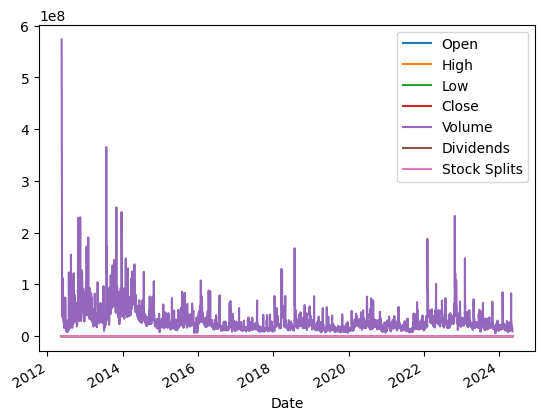

In [8]:
df.plot()

<Axes: xlabel='Date'>

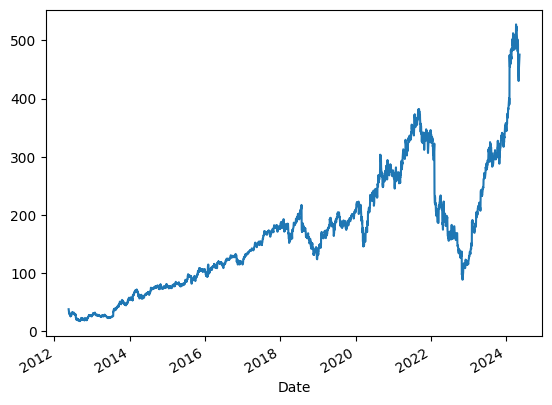

In [9]:
dfw = df.Close
dfw.plot()

In [10]:
df_ma100 = dfw.rolling(100).mean()
df_ma100

Date
2012-05-18 00:00:00-04:00           NaN
2012-05-21 00:00:00-04:00           NaN
2012-05-22 00:00:00-04:00           NaN
2012-05-23 00:00:00-04:00           NaN
2012-05-24 00:00:00-04:00           NaN
                                ...    
2024-05-03 00:00:00-04:00    441.831050
2024-05-06 00:00:00-04:00    443.238497
2024-05-07 00:00:00-04:00    444.582240
2024-05-08 00:00:00-04:00    445.964388
2024-05-09 00:00:00-04:00    447.390419
Name: Close, Length: 3013, dtype: float64

<Axes: xlabel='Date'>

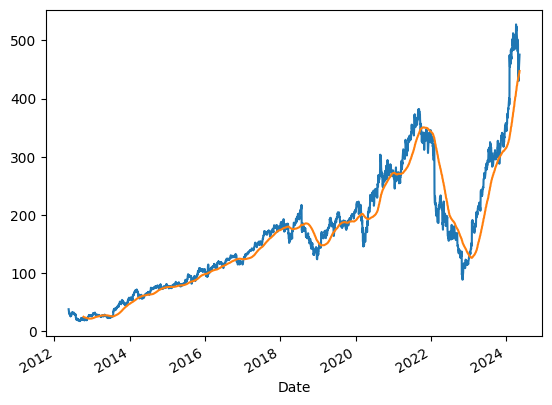

In [11]:
dfw.plot()
df_ma100.plot()

<Axes: xlabel='Date'>

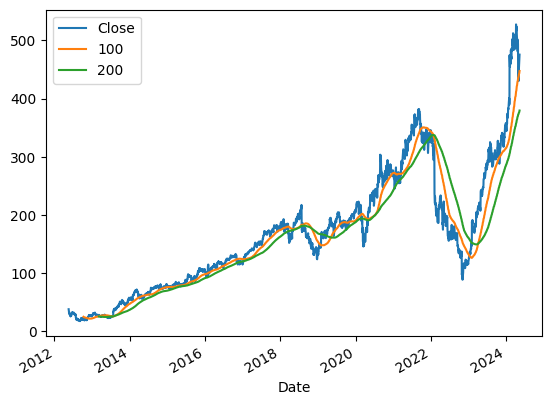

In [12]:
df_ma200 = dfw.rolling(200).mean()

df_ma100.name = '100'
df_ma200.name = '200'

dfw.plot(legend=True)
df_ma100.plot(legend=True)
df_ma200.plot(legend=True)

In [13]:

df_training = pd.DataFrame(dfw[0:int(len(df)*0.70)])
df_testing = pd.DataFrame(dfw[int(len(df)*0.70):])

df.Close.shape, df_training.shape, df_testing.shape

((3013,), (2109, 1), (904, 1))

In [14]:
df_training.tail()

,Close
Date,
2020-09-29 00:00:00-04:00,261.512543
2020-09-30 00:00:00-04:00,261.622406
2020-10-01 00:00:00-04:00,266.347412
2020-10-02 00:00:00-04:00,259.664490
2020-10-05 00:00:00-04:00,264.369507


In [15]:
df_testing.head()

,Close
Date,
2020-10-06 00:00:00-04:00,258.385864
2020-10-07 00:00:00-04:00,257.846405
2020-10-08 00:00:00-04:00,263.480438
2020-10-09 00:00:00-04:00,264.169739
2020-10-12 00:00:00-04:00,275.457733


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [17]:
data_training = scaler.fit_transform(df_training)
data_training

array([[0.07163323],
       [0.05695715],
       [0.04636942],
       ...,
       [0.86973237],
       [0.84635543],
       [0.86281363]])

In [18]:
x_train = []
y_train = []

for i in range(100, data_training.shape[0]):
    x_train.append(data_training[i-100:i])
    y_train.append(data_training[i, 0])


x_train, y_train

([array([[0.07163323],
         [0.05695715],
         [0.04636942],
         [0.04986372],
         [0.05346285],
         [0.04954923],
         [0.03882172],
         [0.03655042],
         [0.04147739],
         [0.03490809],
         [0.03204277],
         [0.02844364],
         [0.03172828],
         [0.02998113],
         [0.03274163],
         [0.03242714],
         [0.03378992],
         [0.03333566],
         [0.03689986],
         [0.04291006],
         [0.04780208],
         [0.04954923],
         [0.048466  ],
         [0.04930463],
         [0.05353273],
         [0.05007338],
         [0.05370745],
         [0.05066741],
         [0.04762737],
         [0.04671885],
         [0.04556573],
         [0.04706828],
         [0.04801174],
         [0.04892026],
         [0.05045775],
         [0.04801174],
         [0.04626458],
         [0.0457055 ],
         [0.04539101],
         [0.03676008],
         [0.03620099],
         [0.03976518],
         [0.03938081],
         [0

In [19]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape, y_train.shape

((2009, 100, 1), (2009,))

In [20]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

2024-05-10 10:37:20.416501: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-10 10:37:20.418077: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-10 10:37:20.452804: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-10 10:37:20.632729: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-10 10:37:22.074603: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [21]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True,
               input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/home/goke/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 176ms/step - loss: 0.0738
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - loss: 0.0064
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 176ms/step - loss: 0.0060
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 181ms/step - loss: 0.0054
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 185ms/step - loss: 0.0056
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 207ms/step - loss: 0.0045
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 198ms/step - loss: 0.0053
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 219ms/step - loss: 0.0044
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 176ms/step - loss: 0.0040
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 193ms/step - loss: 0.0043
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 185ms/step - loss: 0.0036
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 182ms/step - loss: 0.0036
Epoch 13/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 195ms/step - loss: 0.0041
Epoch 14/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 215ms/step - loss: 0.0035
Epoch 15/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 

In [24]:
model.save('fb_lstm_model.h5')


In [44]:
df_testing.head()

,Close
Date,
2020-10-06 00:00:00-04:00,258.385864
2020-10-07 00:00:00-04:00,257.846405
2020-10-08 00:00:00-04:00,263.480438
2020-10-09 00:00:00-04:00,264.169739
2020-10-12 00:00:00-04:00,275.457733


In [55]:
df_past_days = df_training.tail(100)

In [56]:
df_final = pd.concat([df_past_days, df_testing])
df_final

,Close
Date,
2020-05-14 00:00:00-04:00,206.590805
2020-05-15 00:00:00-04:00,210.656494
2020-05-18 00:00:00-04:00,212.964050
2020-05-19 00:00:00-04:00,216.650131
2020-05-20 00:00:00-04:00,229.726257
...,...
2024-05-03 00:00:00-04:00,451.959991
2024-05-06 00:00:00-04:00,465.679993
2024-05-07 00:00:00-04:00,468.239990


In [57]:
df_final.shape, df_testing.shape

((1004, 1), (904, 1))

In [58]:
data_testing = scaler.fit_transform(df_final)
data_testing[0:5], data_testing.shape

(array([[0.26857132],
        [0.27784262],
        [0.28310471],
        [0.29151036],
        [0.32132884]]),
 (1004, 1))

In [59]:
x_test = []
y_test = []

for i in range(100, data_testing.shape[0]):
    x_test.append(data_testing[i-100:i])
    y_test.append(data_testing[i, 0])


x_test, y_test = np.array(x_test), np.array(y_test)
x_test.shape, y_test.shape

((904, 100, 1), (904,))

In [60]:
y_predicted = model.predict(x_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


In [61]:
y_predicted.shape

(904, 1)

In [62]:
scaler.scale_

array([0.00228038])

In [63]:
scale_factor = 1/scaler.scale_
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

y_predicted.shape

(904, 1)

Text(0.5, 0, 'Time')

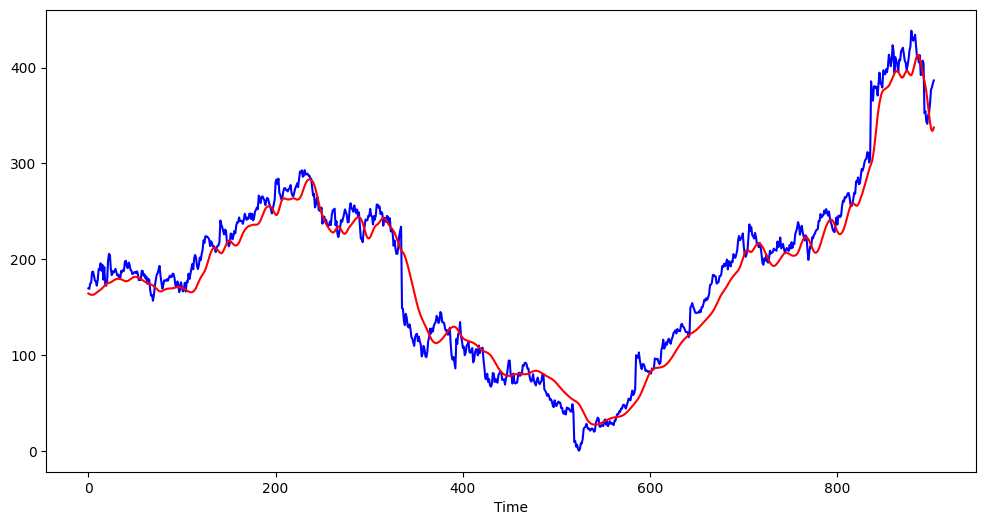

In [79]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')


In [83]:
df_predicted = pd.DataFrame(y_predicted, index=df_testing.index, columns=['Predicted'])


df_predicted.head()

,Predicted
Date,
2020-10-06 00:00:00-04:00,164.146585
2020-10-07 00:00:00-04:00,163.515743
2020-10-08 00:00:00-04:00,163.087862
2020-10-09 00:00:00-04:00,162.837172
2020-10-12 00:00:00-04:00,162.743231


In [84]:
df_testing.head()

,Close
Date,
2020-10-06 00:00:00-04:00,258.385864
2020-10-07 00:00:00-04:00,257.846405
2020-10-08 00:00:00-04:00,263.480438
2020-10-09 00:00:00-04:00,264.169739
2020-10-12 00:00:00-04:00,275.457733


In [91]:
df_testing['pred']= df_predicted
df_testing.head()


,Close,pred
Date,,
2020-10-06 00:00:00-04:00,258.385864,164.146585
2020-10-07 00:00:00-04:00,257.846405,163.515743
2020-10-08 00:00:00-04:00,263.480438,163.087862
2020-10-09 00:00:00-04:00,264.169739,162.837172
2020-10-12 00:00:00-04:00,275.457733,162.743231
